# tf.keras
## 本讲目标：使用八股搭建神经网络
### •神经网络搭建八股
### •iris代码复现
### •MNIST数据集
### •训练MNIST数据集
### •Fashion数据集

# 1、tf.keras搭建网络八股
### 六步法
### import
### train, test
### model = tf.keras.models.Sequential
### model.compile
### model.fit
### model.summary

### （1）model = tf.keras.models.Sequential([网络结构]) #描述各层网络

### 网络结构举例：
### ——拉直层：tf.keras.layers.Flatten( )

### ——全连接层：tf.keras.layers.Dense(神经元个数, activation="激活函数“ ，kernel_regularizer=哪种正则化)
#### activation（字符串给出）可选: relu、softmax、sigmoid 、tanh
#### kernel_regularizer可选:tf.keras.regularizers.l1()、tf.keras.regularizers.l2()

### ——卷积层：tf.keras.layers.Conv2D(filters = 卷积核个数, kernel_size= 卷积核尺寸, strides = 卷积步长, padding = " valid" or "same")

### ——LSTM层：tf.keras.layers.LSTM()

### （2）model.compile(optimizer = 优化器, loss = 损失函数, metrics = [“准确率”] )
### ——Optimizer可选:
#### ‘sgd’ortf.keras.optimizers.SGD(lr=学习率,momentum=动量参数)
#### ‘adagrad’ortf.keras.optimizers.Adagrad(lr=学习率)
#### ‘adadelta’ortf.keras.optimizers.Adadelta(lr=学习率)
#### ‘adam’ortf.keras.optimizers.Adam(lr=学习率, beta_1=0.9, beta_2=0.999)

### ——loss可选：
#### ‘mse’ortf.keras.losses.MeanSquaredError()
#### ‘sparse_categorical_crossentropy’ortf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

### ——Metrics可选:
#### ‘accuracy’ ：y_和y都是数值，如y_=[1] y=[1]
#### ‘categorical_accuracy’ ：y_和y都是独热码(概率分布)，如y_=[0,1,0] y=[0.256,0.695,0.048]
#### ‘sparse_categorical_accuracy’ ：y_是数值，y是独热码(概率分布),如y_=[1] y=[0.256,0.695,0.048]

### （3）model.fit (训练集的输入特征, 训练集的标签, batch_size= , epochs= , 
### validation_data=(测试集的输入特征，测试集的标签), validation_split=
### 从训练集划分多少比例给测试集，validation_freq= 多少次epoch测试一次)

### （4）model.summary（）
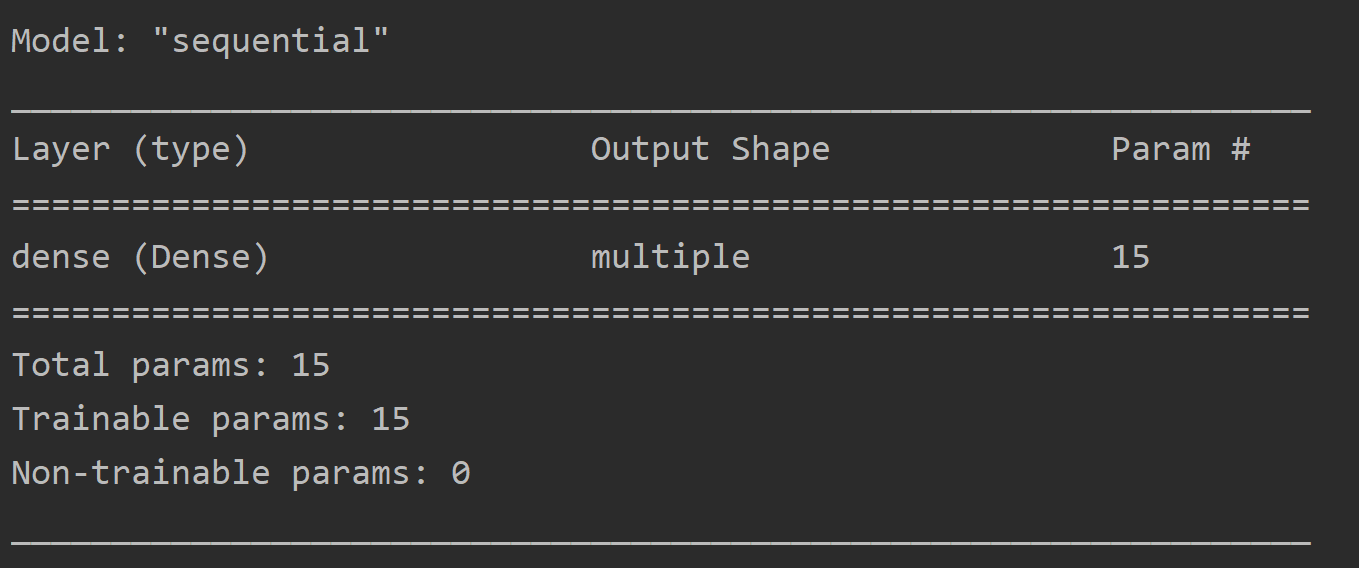

### （5）鸢尾花案例——sequential

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from sklearn import datasets
import numpy as np

x_train = datasets.load_iris().data
y_train = datasets.load_iris().target

np.random.seed(116)
np.random.shuffle(x_train)
np.random.seed(116)
np.random.shuffle(y_train)
tf.random.set_seed(116)


class IrisModel(Model):
    def __init__(self):
        super(IrisModel, self).__init__()
        self.d1 = Dense(3, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2())

    def call(self, x):
        y = self.d1(x)
        return y


model = IrisModel()

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=500, validation_split=0.2, validation_freq=20, verbose=2)
model.summary()


Epoch 1/500
4/4 - 0s - loss: 1.1385 - sparse_categorical_accuracy: 0.3000
Epoch 2/500
4/4 - 0s - loss: 0.9900 - sparse_categorical_accuracy: 0.3000
Epoch 3/500
4/4 - 0s - loss: 0.9765 - sparse_categorical_accuracy: 0.3000
Epoch 4/500
4/4 - 0s - loss: 0.9622 - sparse_categorical_accuracy: 0.3000
Epoch 5/500
4/4 - 0s - loss: 0.9505 - sparse_categorical_accuracy: 0.3000
Epoch 6/500
4/4 - 0s - loss: 0.9399 - sparse_categorical_accuracy: 0.3000
Epoch 7/500
4/4 - 0s - loss: 0.9266 - sparse_categorical_accuracy: 0.3000
Epoch 8/500
4/4 - 0s - loss: 0.9164 - sparse_categorical_accuracy: 0.3000
Epoch 9/500
4/4 - 0s - loss: 0.9044 - sparse_categorical_accuracy: 0.3000
Epoch 10/500
4/4 - 0s - loss: 0.8942 - sparse_categorical_accuracy: 0.3083
Epoch 11/500
4/4 - 0s - loss: 0.8815 - sparse_categorical_accuracy: 0.3167
Epoch 12/500
4/4 - 0s - loss: 0.8699 - sparse_categorical_accuracy: 0.3333
Epoch 13/500
4/4 - 0s - loss: 0.8597 - sparse_categorical_accuracy: 0.3667
Epoch 14/500
4/4 - 0s - loss: 0.84

Epoch 107/500
4/4 - 0s - loss: 0.4114 - sparse_categorical_accuracy: 0.9000
Epoch 108/500
4/4 - 0s - loss: 0.4213 - sparse_categorical_accuracy: 0.8917
Epoch 109/500
4/4 - 0s - loss: 0.3905 - sparse_categorical_accuracy: 0.9417
Epoch 110/500
4/4 - 0s - loss: 0.4130 - sparse_categorical_accuracy: 0.8917
Epoch 111/500
4/4 - 0s - loss: 0.3844 - sparse_categorical_accuracy: 0.9583
Epoch 112/500
4/4 - 0s - loss: 0.3956 - sparse_categorical_accuracy: 0.9250
Epoch 113/500
4/4 - 0s - loss: 0.4590 - sparse_categorical_accuracy: 0.8750
Epoch 114/500
4/4 - 0s - loss: 0.3904 - sparse_categorical_accuracy: 0.9417
Epoch 115/500
4/4 - 0s - loss: 0.4084 - sparse_categorical_accuracy: 0.9000
Epoch 116/500
4/4 - 0s - loss: 0.4213 - sparse_categorical_accuracy: 0.8750
Epoch 117/500
4/4 - 0s - loss: 0.5587 - sparse_categorical_accuracy: 0.8000
Epoch 118/500
4/4 - 0s - loss: 0.3942 - sparse_categorical_accuracy: 0.9333
Epoch 119/500
4/4 - 0s - loss: 0.3909 - sparse_categorical_accuracy: 0.9167
Epoch 120/50

Epoch 211/500
4/4 - 0s - loss: 0.4905 - sparse_categorical_accuracy: 0.8250
Epoch 212/500
4/4 - 0s - loss: 0.3879 - sparse_categorical_accuracy: 0.9000
Epoch 213/500
4/4 - 0s - loss: 0.3778 - sparse_categorical_accuracy: 0.9333
Epoch 214/500
4/4 - 0s - loss: 0.4123 - sparse_categorical_accuracy: 0.9250
Epoch 215/500
4/4 - 0s - loss: 0.3740 - sparse_categorical_accuracy: 0.9667
Epoch 216/500
4/4 - 0s - loss: 0.4073 - sparse_categorical_accuracy: 0.8917
Epoch 217/500
4/4 - 0s - loss: 0.3812 - sparse_categorical_accuracy: 0.9750
Epoch 218/500
4/4 - 0s - loss: 0.3761 - sparse_categorical_accuracy: 0.9417
Epoch 219/500
4/4 - 0s - loss: 0.3837 - sparse_categorical_accuracy: 0.9250
Epoch 220/500
4/4 - 0s - loss: 0.3662 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.3891 - val_sparse_categorical_accuracy: 0.8667
Epoch 221/500
4/4 - 0s - loss: 0.4607 - sparse_categorical_accuracy: 0.8417
Epoch 222/500
4/4 - 0s - loss: 0.5398 - sparse_categorical_accuracy: 0.7667
Epoch 223/500
4/4 - 0s - lo

Epoch 315/500
4/4 - 0s - loss: 0.3811 - sparse_categorical_accuracy: 0.9500
Epoch 316/500
4/4 - 0s - loss: 0.4306 - sparse_categorical_accuracy: 0.8917
Epoch 317/500
4/4 - 0s - loss: 0.3883 - sparse_categorical_accuracy: 0.9083
Epoch 318/500
4/4 - 0s - loss: 0.3662 - sparse_categorical_accuracy: 0.9583
Epoch 319/500
4/4 - 0s - loss: 0.4393 - sparse_categorical_accuracy: 0.8833
Epoch 320/500
4/4 - 0s - loss: 0.5612 - sparse_categorical_accuracy: 0.7750 - val_loss: 0.3521 - val_sparse_categorical_accuracy: 0.9667
Epoch 321/500
4/4 - 0s - loss: 0.4003 - sparse_categorical_accuracy: 0.9000
Epoch 322/500
4/4 - 0s - loss: 0.3669 - sparse_categorical_accuracy: 0.9583
Epoch 323/500
4/4 - 0s - loss: 0.3775 - sparse_categorical_accuracy: 0.9500
Epoch 324/500
4/4 - 0s - loss: 0.3743 - sparse_categorical_accuracy: 0.9500
Epoch 325/500
4/4 - 0s - loss: 0.4715 - sparse_categorical_accuracy: 0.8500
Epoch 326/500
4/4 - 0s - loss: 0.3894 - sparse_categorical_accuracy: 0.9417
Epoch 327/500
4/4 - 0s - lo

Epoch 419/500
4/4 - 0s - loss: 0.3693 - sparse_categorical_accuracy: 0.9417
Epoch 420/500
4/4 - 0s - loss: 0.3639 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.3786 - val_sparse_categorical_accuracy: 1.0000
Epoch 421/500
4/4 - 0s - loss: 0.3633 - sparse_categorical_accuracy: 0.9583
Epoch 422/500
4/4 - 0s - loss: 0.3794 - sparse_categorical_accuracy: 0.9667
Epoch 423/500
4/4 - 0s - loss: 0.5011 - sparse_categorical_accuracy: 0.8167
Epoch 424/500
4/4 - 0s - loss: 0.3833 - sparse_categorical_accuracy: 0.9333
Epoch 425/500
4/4 - 0s - loss: 0.3842 - sparse_categorical_accuracy: 0.9417
Epoch 426/500
4/4 - 0s - loss: 0.5120 - sparse_categorical_accuracy: 0.7833
Epoch 427/500
4/4 - 0s - loss: 0.4455 - sparse_categorical_accuracy: 0.8667
Epoch 428/500
4/4 - 0s - loss: 0.3915 - sparse_categorical_accuracy: 0.9250
Epoch 429/500
4/4 - 0s - loss: 0.4006 - sparse_categorical_accuracy: 0.8917
Epoch 430/500
4/4 - 0s - loss: 0.4792 - sparse_categorical_accuracy: 0.8667
Epoch 431/500
4/4 - 0s - lo

# 2、六步法——class
### 调用方法：
### classMyModel(Model):
            def __init__(self):
                super(MyModel, self).__init__()
                定义网络结构块
            def call(self, x):
                调用网络结构块，实现前向传播
                return y
            
### model= MyModel()
#### __init__( ) 定义所需网络结构块
#### call( ) 写出前向传播
### 鸢尾花案例——class

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from sklearn import datasets
import numpy as np

x_train = datasets.load_iris().data
y_train = datasets.load_iris().target

np.random.seed(116)
np.random.shuffle(x_train)
np.random.seed(116)
np.random.shuffle(y_train)
tf.random.set_seed(116)


class IrisModel(Model):
    def __init__(self):
        super(IrisModel, self).__init__()
        self.d1 = Dense(3, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2())

    def call(self, x):
        y = self.d1(x)
        return y


model = IrisModel()

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=500, validation_split=0.2, validation_freq=20, verbose=2)
model.summary()

Epoch 1/500
4/4 - 0s - loss: 1.1385 - sparse_categorical_accuracy: 0.3000
Epoch 2/500
4/4 - 0s - loss: 0.9900 - sparse_categorical_accuracy: 0.3000
Epoch 3/500
4/4 - 0s - loss: 0.9765 - sparse_categorical_accuracy: 0.3000
Epoch 4/500
4/4 - 0s - loss: 0.9622 - sparse_categorical_accuracy: 0.3000
Epoch 5/500
4/4 - 0s - loss: 0.9505 - sparse_categorical_accuracy: 0.3000
Epoch 6/500
4/4 - 0s - loss: 0.9399 - sparse_categorical_accuracy: 0.3000
Epoch 7/500
4/4 - 0s - loss: 0.9266 - sparse_categorical_accuracy: 0.3000
Epoch 8/500
4/4 - 0s - loss: 0.9164 - sparse_categorical_accuracy: 0.3000
Epoch 9/500
4/4 - 0s - loss: 0.9044 - sparse_categorical_accuracy: 0.3000
Epoch 10/500
4/4 - 0s - loss: 0.8942 - sparse_categorical_accuracy: 0.3083
Epoch 11/500
4/4 - 0s - loss: 0.8815 - sparse_categorical_accuracy: 0.3167
Epoch 12/500
4/4 - 0s - loss: 0.8699 - sparse_categorical_accuracy: 0.3333
Epoch 13/500
4/4 - 0s - loss: 0.8597 - sparse_categorical_accuracy: 0.3667
Epoch 14/500
4/4 - 0s - loss: 0.84

Epoch 107/500
4/4 - 0s - loss: 0.4114 - sparse_categorical_accuracy: 0.9000
Epoch 108/500
4/4 - 0s - loss: 0.4213 - sparse_categorical_accuracy: 0.8917
Epoch 109/500
4/4 - 0s - loss: 0.3905 - sparse_categorical_accuracy: 0.9417
Epoch 110/500
4/4 - 0s - loss: 0.4130 - sparse_categorical_accuracy: 0.8917
Epoch 111/500
4/4 - 0s - loss: 0.3844 - sparse_categorical_accuracy: 0.9583
Epoch 112/500
4/4 - 0s - loss: 0.3956 - sparse_categorical_accuracy: 0.9250
Epoch 113/500
4/4 - 0s - loss: 0.4590 - sparse_categorical_accuracy: 0.8750
Epoch 114/500
4/4 - 0s - loss: 0.3904 - sparse_categorical_accuracy: 0.9417
Epoch 115/500
4/4 - 0s - loss: 0.4084 - sparse_categorical_accuracy: 0.9000
Epoch 116/500
4/4 - 0s - loss: 0.4213 - sparse_categorical_accuracy: 0.8750
Epoch 117/500
4/4 - 0s - loss: 0.5587 - sparse_categorical_accuracy: 0.8000
Epoch 118/500
4/4 - 0s - loss: 0.3942 - sparse_categorical_accuracy: 0.9333
Epoch 119/500
4/4 - 0s - loss: 0.3909 - sparse_categorical_accuracy: 0.9167
Epoch 120/50

Epoch 211/500
4/4 - 0s - loss: 0.4905 - sparse_categorical_accuracy: 0.8250
Epoch 212/500
4/4 - 0s - loss: 0.3879 - sparse_categorical_accuracy: 0.9000
Epoch 213/500
4/4 - 0s - loss: 0.3778 - sparse_categorical_accuracy: 0.9333
Epoch 214/500
4/4 - 0s - loss: 0.4123 - sparse_categorical_accuracy: 0.9250
Epoch 215/500
4/4 - 0s - loss: 0.3740 - sparse_categorical_accuracy: 0.9667
Epoch 216/500
4/4 - 0s - loss: 0.4073 - sparse_categorical_accuracy: 0.8917
Epoch 217/500
4/4 - 0s - loss: 0.3812 - sparse_categorical_accuracy: 0.9750
Epoch 218/500
4/4 - 0s - loss: 0.3761 - sparse_categorical_accuracy: 0.9417
Epoch 219/500
4/4 - 0s - loss: 0.3837 - sparse_categorical_accuracy: 0.9250
Epoch 220/500
4/4 - 0s - loss: 0.3662 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.3891 - val_sparse_categorical_accuracy: 0.8667
Epoch 221/500
4/4 - 0s - loss: 0.4607 - sparse_categorical_accuracy: 0.8417
Epoch 222/500
4/4 - 0s - loss: 0.5398 - sparse_categorical_accuracy: 0.7667
Epoch 223/500
4/4 - 0s - lo

Epoch 315/500
4/4 - 0s - loss: 0.3811 - sparse_categorical_accuracy: 0.9500
Epoch 316/500
4/4 - 0s - loss: 0.4306 - sparse_categorical_accuracy: 0.8917
Epoch 317/500
4/4 - 0s - loss: 0.3883 - sparse_categorical_accuracy: 0.9083
Epoch 318/500
4/4 - 0s - loss: 0.3662 - sparse_categorical_accuracy: 0.9583
Epoch 319/500
4/4 - 0s - loss: 0.4393 - sparse_categorical_accuracy: 0.8833
Epoch 320/500
4/4 - 0s - loss: 0.5612 - sparse_categorical_accuracy: 0.7750 - val_loss: 0.3521 - val_sparse_categorical_accuracy: 0.9667
Epoch 321/500
4/4 - 0s - loss: 0.4003 - sparse_categorical_accuracy: 0.9000
Epoch 322/500
4/4 - 0s - loss: 0.3669 - sparse_categorical_accuracy: 0.9583
Epoch 323/500
4/4 - 0s - loss: 0.3775 - sparse_categorical_accuracy: 0.9500
Epoch 324/500
4/4 - 0s - loss: 0.3743 - sparse_categorical_accuracy: 0.9500
Epoch 325/500
4/4 - 0s - loss: 0.4715 - sparse_categorical_accuracy: 0.8500
Epoch 326/500
4/4 - 0s - loss: 0.3894 - sparse_categorical_accuracy: 0.9417
Epoch 327/500
4/4 - 0s - lo

Epoch 419/500
4/4 - 0s - loss: 0.3693 - sparse_categorical_accuracy: 0.9417
Epoch 420/500
4/4 - 0s - loss: 0.3639 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.3786 - val_sparse_categorical_accuracy: 1.0000
Epoch 421/500
4/4 - 0s - loss: 0.3633 - sparse_categorical_accuracy: 0.9583
Epoch 422/500
4/4 - 0s - loss: 0.3794 - sparse_categorical_accuracy: 0.9667
Epoch 423/500
4/4 - 0s - loss: 0.5011 - sparse_categorical_accuracy: 0.8167
Epoch 424/500
4/4 - 0s - loss: 0.3833 - sparse_categorical_accuracy: 0.9333
Epoch 425/500
4/4 - 0s - loss: 0.3842 - sparse_categorical_accuracy: 0.9417
Epoch 426/500
4/4 - 0s - loss: 0.5120 - sparse_categorical_accuracy: 0.7833
Epoch 427/500
4/4 - 0s - loss: 0.4455 - sparse_categorical_accuracy: 0.8667
Epoch 428/500
4/4 - 0s - loss: 0.3915 - sparse_categorical_accuracy: 0.9250
Epoch 429/500
4/4 - 0s - loss: 0.4006 - sparse_categorical_accuracy: 0.8917
Epoch 430/500
4/4 - 0s - loss: 0.4792 - sparse_categorical_accuracy: 0.8667
Epoch 431/500
4/4 - 0s - lo

# 3、MNIST数据集：
### 提供6万张28*28 像素点的0~9手写数字图片和标签，用于训练。
### 提供1万张28*28 像素点的0~9手写数字图片和标签，用于测试。
### （1）导入MNIST数据集：
#### mnist= tf.keras.datasets.mnist
#### (x_train, y_train) , (x_test, y_test) = mnist.load_data()

### （2）作为输入特征，输入神经网络时，将数据拉伸为一维数组：
#### tf.keras.layers.Flatten( )

### 具体实现如下
### MNIST——sequential

In [3]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2508 - sparse_categorical_accuracy: 0.9294 - val_loss: 0.1320 - val_sparse_categorical_accuracy: 0.9597
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1117 - sparse_categorical_accuracy: 0.9670 - val_loss: 0.1034 - val_sparse_categorical_accuracy: 0.9703
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0761 - sparse_categorical_accuracy: 0.9774 - val_loss: 0.0851 - val_sparse_categorical_accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0576 - sparse_categorical_accuracy: 0.9829 - val_loss: 0.0771 - val_sparse_categorical_accuracy: 0.9760
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0438 - sparse_categorical_accuracy: 0.9869 - val_loss: 0.0738 - val_sparse_categorical_accuracy: 0.9760
Model: "sequential"
_________________________________________________________________
Layer (

### MNIST——class

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


class MnistModel(Model):
    def __init__(self):
        super(MnistModel, self).__init__()
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        y = self.d2(x)
        return y


model = MnistModel()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2601 - sparse_categorical_accuracy: 0.9265 - val_loss: 0.1397 - val_sparse_categorical_accuracy: 0.9568
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1127 - sparse_categorical_accuracy: 0.9669 - val_loss: 0.0989 - val_sparse_categorical_accuracy: 0.9706
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0759 - sparse_categorical_accuracy: 0.9774 - val_loss: 0.0866 - val_sparse_categorical_accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0572 - sparse_categorical_accuracy: 0.9824 - val_loss: 0.0740 - val_sparse_categorical_accuracy: 0.9762
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0438 - sparse_categorical_accuracy: 0.9866 - val_loss: 0.0777 - val_sparse_categorical_accuracy: 0.9761
Model: "mnist_model"
_________________________________________________________________
Layer (

# 4、FASHION数据集：
### 提供6万张28*28 像素点的衣裤等图片和标签，用于训练。
### 提供1万张28*28 像素点的衣裤等图片和标签，用于测试。

### 导入FASHION数据集
#### fashion = tf.keras.datasets.fashion_mnist(x_train, y_train),(x_test, y_test) = fashion.load_data()

### 具体实现如下
### FASHION——sequential

In [5]:
import tensorflow as tf

fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5022 - sparse_categorical_accuracy: 0.8241 - val_loss: 0.4137 - val_sparse_categorical_accuracy: 0.8531
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3776 - sparse_categorical_accuracy: 0.8643 - val_loss: 0.4128 - val_sparse_categorical_accuracy: 0.8575
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3391 - sparse_categorical_accuracy: 0.8762 - val_loss: 0.3868 - val_sparse_categorical_accuracy: 0.8609
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3153 - sparse_categorical_accuracy: 0.8843 - val_loss: 0.3736 - val_sparse_categorical_accuracy: 0.8643
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2968 - sparse_categorical_accuracy: 0.8917 - val_loss: 0.3617 - val_sparse_categorical_accuracy: 0.8690
Model: "sequential_1"
_________________________________________________________________
Laye

### FASHION——class

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


class FashionModel(Model):
    def __init__(self):
        super(FashionModel, self).__init__()
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        y = self.d2(x)
        return y


model = FashionModel()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4998 - sparse_categorical_accuracy: 0.8241 - val_loss: 0.4051 - val_sparse_categorical_accuracy: 0.8543
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3737 - sparse_categorical_accuracy: 0.8652 - val_loss: 0.4044 - val_sparse_categorical_accuracy: 0.8572
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3347 - sparse_categorical_accuracy: 0.8785 - val_loss: 0.3784 - val_sparse_categorical_accuracy: 0.8629
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3121 - sparse_categorical_accuracy: 0.8859 - val_loss: 0.3685 - val_sparse_categorical_accuracy: 0.8636
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2957 - sparse_categorical_accuracy: 0.8921 - val_loss: 0.3477 - val_sparse_categorical_accuracy: 0.8726
Model: "fashion_model"
_________________________________________________________________
La